In [321]:
import re
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [322]:
#reading csv file
x=pd.read_csv("/Users/nihalpandey/Downloads/nlp-getting-started/train.csv")

In [323]:
#x.head()

In [324]:
x.drop(['id','keyword','location'],axis=1,inplace=True)

In [325]:
#x.head()

In [326]:
x.shape

(7613, 2)

In [327]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7613 non-null   object
 1   target  7613 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.1+ KB


In [328]:
#x=x.drop('target',axis=1)
#x.head()

In [329]:
#no null value present


# text preprocessing

In [330]:
#removing url
x['clean'] = x['text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

In [331]:
#removing punctuation and other symbols
def remove(text):
    text=re.sub('[^a-zA-Z]',' ',text)
    return text

In [332]:
x['clean']=x['clean'].apply(remove)

In [333]:
def lower(text):
    text=str(text).lower()
    return text

In [334]:
x['clean']=x['clean'].apply(lower)
x.head()

,text,target,clean
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake m...
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are ...
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation or...
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as ...


In [335]:
#tokenisation
def cleantext(text):
    text=word_tokenize(text)
    return text
    

In [336]:
x['clean']=x['clean'].apply(cleantext)

In [337]:
#x.head()

In [338]:
#remove text column because no use of it
x.drop(['text'],axis=1,inplace=True)

In [339]:
#remove stopwords
stop_words=set(stopwords.words('english'))
def stopwords(text):
    text=[w for w in text if w not in stop_words]
    return text

In [340]:
x['clean']=x.clean.apply(stopwords)

In [341]:
#x.head()

In [342]:
def lemmitixation(text):
    return [lemma.lemmatize(word=w,pos='v') for w in text]

In [343]:
lemma=WordNetLemmatizer()
x['clean']=x['clean'].apply(lemmitixation)
x.head()

,target,clean
0,1,"[deeds, reason, earthquake, may, allah, forgiv..."
1,1,"[forest, fire, near, la, ronge, sask, canada]"
2,1,"[residents, ask, shelter, place, notify, offic..."
3,1,"[people, receive, wildfires, evacuation, order..."
4,1,"[get, send, photo, ruby, alaska, smoke, wildfi..."


In [344]:
#def lengt(text):
    #return [i for i in text if len(i) > 2]


In [345]:
#x['clean']=x.clean.apply(lengt)

In [346]:
#x.head()

In [347]:
def string(text):
    return ' '.join(text)


In [348]:
x['clean']=x['clean'].apply(string)
x.head()

,target,clean
0,1,deeds reason earthquake may allah forgive us
1,1,forest fire near la ronge sask canada
2,1,residents ask shelter place notify officer eva...
3,1,people receive wildfires evacuation order cali...
4,1,get send photo ruby alaska smoke wildfires pou...


In [349]:
class0=x[x.target==0]['clean']
class1=x[x.target==1]['clean']

In [350]:
print(class0.shape)
print(class1.shape)
split=[class0,class1]
color=['Accent','Paired']

(4342,)
(3271,)


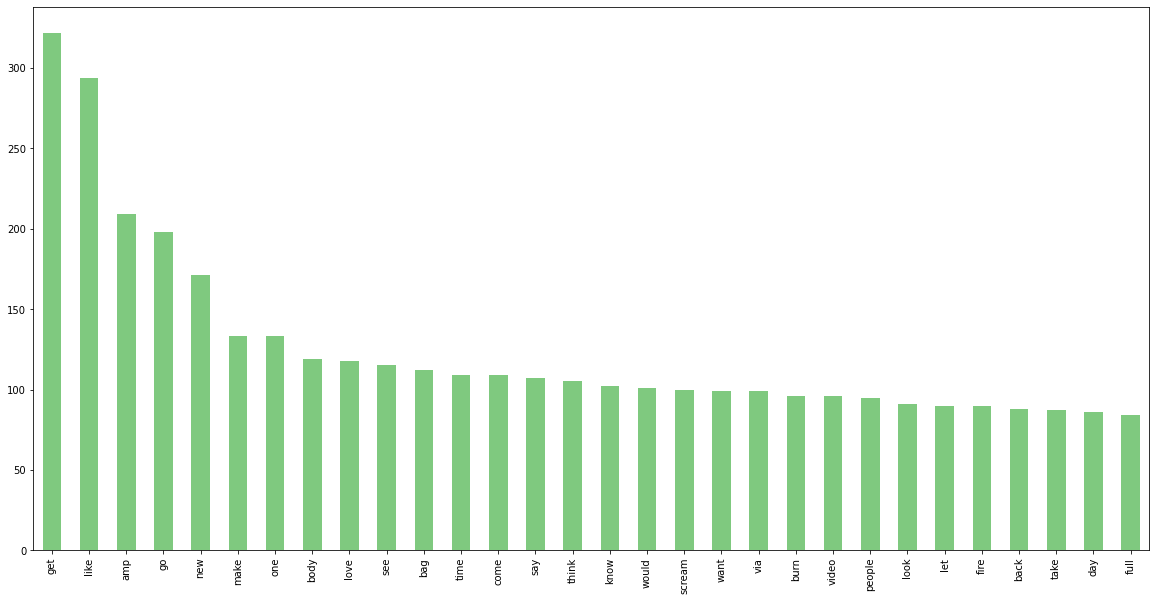

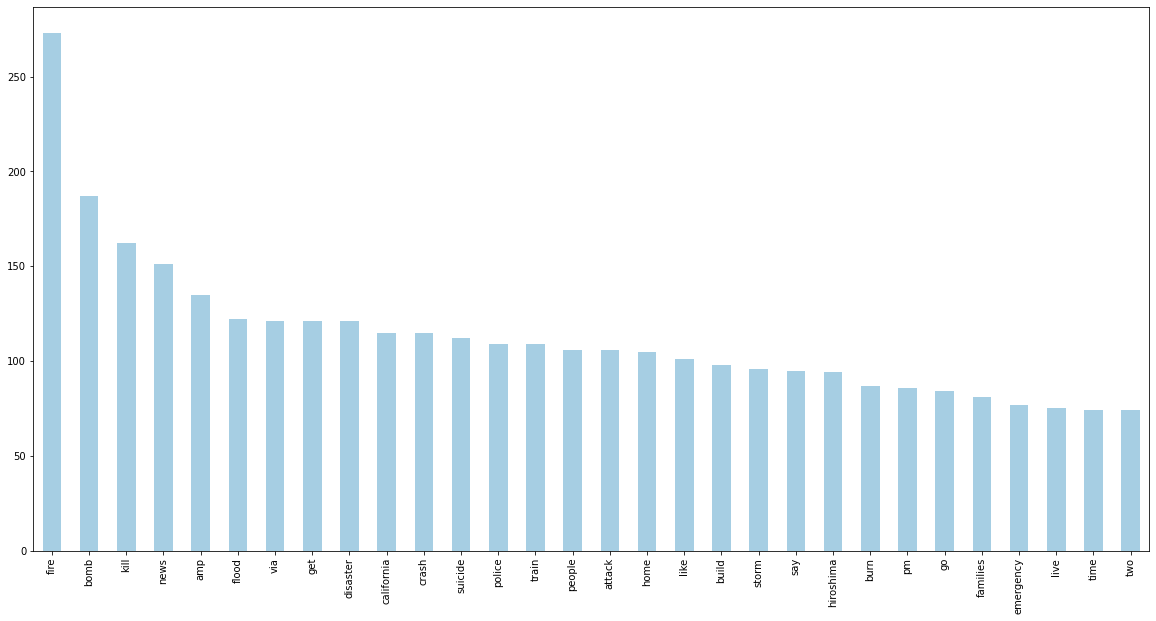

In [352]:
for item in range(2):
    plt.figure(figsize=(20,10))
    pd.Series(' '.join([i for i in split[item]]).split()).value_counts().head(n=30).plot(kind='bar',colormap=color[item])

In [353]:
def wordremove1(text):
    return ' '.join([i for i in text.split() if i !='amp'])

In [354]:
x['clean']=x.clean.apply(wordremove1)
x.head()

,target,clean
0,1,deeds reason earthquake may allah forgive us
1,1,forest fire near la ronge sask canada
2,1,residents ask shelter place notify officer eva...
3,1,people receive wildfires evacuation order cali...
4,1,get send photo ruby alaska smoke wildfires pou...


In [355]:
#def wordremove2(text):
    #return ' '.join([i for i in text.split() if i !='emergency'])

In [356]:
#x['clean']=x.clean.apply(wordremove2)

In [357]:
def wordremove3(text):
    return ' '.join([i for i in text.split() if i !='burn'])

In [358]:
x['clean']=x.clean.apply(wordremove3)

In [359]:
#def wordremove4(text):
    #return ' '.join([i for i in text.split() if i !='people'])

In [360]:
#train test split

In [361]:
Y=x.iloc[:,0]
x.drop('target',axis=1,inplace=True)


In [362]:
Y.head()
Y=Y.values

In [363]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,Y,test_size=0.25,random_state=42)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)




(5709, 1) (5709,)
(1904, 1) (1904,)


In [364]:
#vectorizer

In [365]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [389]:
vectorizer = TfidfVectorizer(ngram_range=(1,1))
X = vectorizer.fit_transform(xtrain.clean).toarray()
xt_vec = vectorizer.transform(xtest.clean).toarray()

In [390]:
from sklearn.naive_bayes import MultinomialNB

In [391]:
mul=MultinomialNB()

In [392]:
mul.fit(X,ytrain)

MultinomialNB()

In [393]:
xt_vec = vectorizer.transform(xtest.clean).toarray()

In [394]:
predict1=mul.predict(xt_vec)

In [395]:
mul.score(xt_vec,ytest)

0.8035714285714286

In [396]:
from sklearn.linear_model import LogisticRegression

In [397]:
lo=LogisticRegression()

In [398]:
lo.fit(X,ytrain)

LogisticRegression()

In [399]:
predict2=lo.predict(xt_vec)

In [400]:
lo.score(xt_vec,ytest)

0.8077731092436975

In [57]:
#reading csv file
HU=pd.read_csv("/Users/nihalpandey/Downloads/nlp-getting-started/train.csv")

In [58]:
HU.text[15]

"What's up man?"

In [401]:
from sklearn.feature_extraction.text import CountVectorizer

In [403]:
cv=CountVectorizer(ngram_range=(1,1))

In [404]:
X1 = cv.fit_transform(xtrain.clean).toarray()
xt_vec1 = cv.transform(xtest.clean).toarray()

In [405]:
lo.fit(X1,ytrain)

LogisticRegression()

In [406]:
lo.predict(xt_vec1)

array([0, 0, 1, ..., 1, 0, 0])

In [407]:
lo.score(xt_vec1,ytest)

0.8004201680672269